# Importing Statements

In [24]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import seaborn as sns
import splitfolders
import tensorflow as tf


from skimage import feature
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow import keras
from sklearn.utils import shuffle




# Splitting the Dataset

In [ ]:
input_folder = "dataset"
output_folder = "split_dataset"

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.7,0.1,0.2))
print("Dataset successfully split into training, validating and testing")

Dataset successfully split into training, validating and testing


In [25]:
train_path = "split_dataset/train"
val_path = "split_dataset/val"
test_path = "split_dataset/test"      

label_names = ["2", "4", "7", "alpha", "beta", "lim", "pi","pm","theta","times"]    

# Preprocessing Data

In [26]:
def load_data(dataset_path, img_size=(28, 28)):
    data = []
    labels = []
    class_names = sorted(os.listdir(dataset_path))
    
    for label, folder in enumerate(class_names):
        folder_path = os.path.join(dataset_path, folder)
        
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                
                if image is not None:
                    image = cv2.resize(image, img_size)
                    image = image.flatten() / 255.0 
                    data.append(image)
                    labels.append(label)
                    
    return np.array(data), np.array(labels)
                      

X_train, y_train = load_data(train_path)
X_val, y_val = load_data(val_path)
X_test, y_test = load_data(test_path)

X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_val, y_val = shuffle(X_val, y_val, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [28]:
print(f"Training images: {X_train.shape[0]}")
print(f"Validation images: {X_val.shape[0]}")
print(f"Test images: {X_test.shape[0]}")

Training images: 3500
Validation images: 500
Test images: 1000


# Displaying random preprocessed images

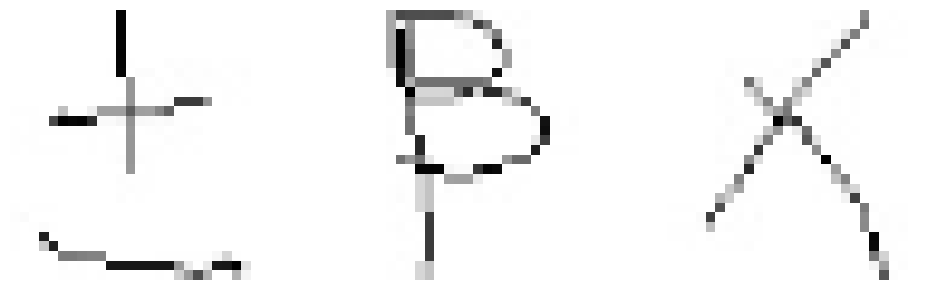

In [29]:
indices = np.random.choice(len(X_train), 3, replace=False)

plt.figure(figsize=(10, 3))
for i, idx in enumerate(indices):
    image = X_train[idx].reshape(28, 28)  
    label = y_train[idx]
    
    plt.subplot(1, 3, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

# SVM classifier

In [30]:
model = svm.SVC(kernel='rbf',C=10.0, random_state=42) 
model.fit(X_train, y_train)

print("Train set Accuracy: {:.3f}".format(model.score(X_train, y_train)))

Train set Accuracy: 1.000


# SVM Results

Classification Report for SVM

In [31]:
y_pred = model.predict(X_test)

print("Classification Report (SVM):\n")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Final Accuracy: {:.3f}".format(accuracy))


Classification Report (SVM):

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       100
           1       0.91      0.87      0.89       100
           2       0.97      0.93      0.95       100
           3       0.94      0.94      0.94       100
           4       0.93      0.99      0.96       100
           5       0.99      0.97      0.98       100
           6       0.94      0.95      0.95       100
           7       1.00      0.99      0.99       100
           8       0.98      0.92      0.95       100
           9       0.96      0.97      0.97       100

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

Final Accuracy: 0.949


Confusion Matrix

[[96  1  1  0  0  0  2  0  0  0]
 [ 1 87  1  4  2  1  1  0  0  3]
 [ 2  4 93  0  0  0  1  0  0  0]
 [ 3  3  0 94  0  0  0  0  0  0]
 [ 0  0  0  0 99  0  0  0  1  0]
 [ 2  0  0  1  0 97  0  0  0  0]
 [ 0  1  1  0  1  0 95  0  1  1]
 [ 1  0  0  0  0  0  0 99  0  0]
 [ 1  0  0  1  4  0  2  0 92  0]
 [ 3  0  0  0  0  0  0  0  0 97]]


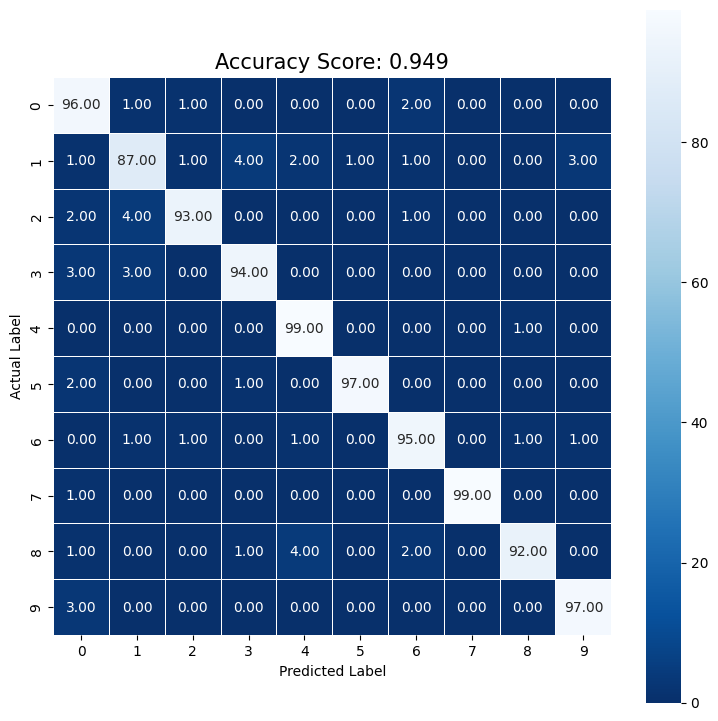

In [32]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);
plt.show()

Visualisation of testing data

4
pm
2
beta


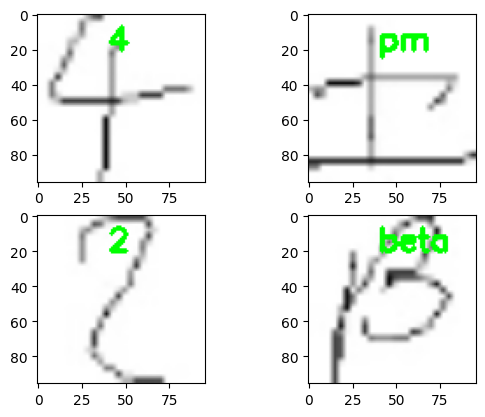

In [33]:
pp_images = []
pp_labels = []

for i in np.random.choice(np.arange(0, len(y_test)), size=16):
    test_img = X_test[i].reshape(28, 28) * 255.0 
    test_img = test_img.astype(np.uint8)
    
    pred = model.predict(X_test[i].reshape(1, -1))[0]
    
    label = label_names[pred] if label_names else str(pred)
    pp_labels.append(label)    
    img_view = cv2.resize(test_img, (96, 96), interpolation=cv2.INTER_LINEAR)
    img_view = cv2.cvtColor(img_view, cv2.COLOR_GRAY2BGR)
    cv2.putText(img_view, label, (40, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
    pp_images.append(img_view)
    
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(pp_images[1])
print(pp_labels[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(pp_images[2])
print(pp_labels[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(pp_images[3])
print(pp_labels[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(pp_images[4])
print(pp_labels[4])

# ANN Classifier

In [41]:
num_classes = len(np.unique(y_train))

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

H = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20,batch_size=32)

Epoch 1/20


c:\Users\Mark\Desktop\42028-Assignment-1\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1045 - loss: 2.3840 - val_accuracy: 0.1140 - val_loss: 2.2854
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1658 - loss: 2.2524 - val_accuracy: 0.3100 - val_loss: 2.1500
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3027 - loss: 2.0922 - val_accuracy: 0.4380 - val_loss: 1.8555
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4087 - loss: 1.8165 - val_accuracy: 0.3420 - val_loss: 1.7284
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4922 - loss: 1.5537 - val_accuracy: 0.4860 - val_loss: 1.3978
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5880 - loss: 1.3026 - val_accuracy: 0.5700 - val_loss: 1.2722
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6510 - loss: 1.1506 - val_accuracy: 0.6160 - val_loss: 1.1688
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6608 - loss: 1.0586 - val_accuracy: 0.7040 - val_

# ANN Results

In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

Classification Report

In [36]:
y_pred_probs = model.predict(X_test)
y_pred_ann = np.argmax(y_pred_probs, axis=1)

print("Classification Report (ANN):")
print(classification_report(y_test, y_pred_ann))

accuracy = accuracy_score(y_test, y_pred_ann)
print("Final Accuracy: {:.3f}".format(accuracy))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Classification Report (ANN):
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       100
           1       0.81      0.63      0.71       100
           2       0.80      0.90      0.85       100
           3       0.77      0.88      0.82       100
           4       0.90      0.88      0.89       100
           5       0.99      0.90      0.94       100
           6       0.98      0.48      0.64       100
           7       0.88      0.93      0.90       100
           8       0.89      0.83      0.86       100
           9       0.68      0.92      0.78       100

    accuracy                           0.82      1000
   macro avg       0.84      0.82      0.81      1000
weighted avg       0.84      0.82      0.81      1000

Final Accuracy: 0.817


Confusion Matrix

[[82  0  0  4  0  0  0  9  1  4]
 [ 8 63  5  7  1  0  0  1  6  9]
 [ 2  4 90  1  1  0  1  0  0  1]
 [ 3  3  0 88  0  0  0  0  0  6]
 [ 1  1  4  1 88  0  0  1  3  1]
 [ 6  0  0  4  0 90  0  0  0  0]
 [10  5 12  1  2  0 48  0  0 22]
 [ 4  0  0  3  0  0  0 93  0  0]
 [ 4  2  1  1  6  1  0  2 83  0]
 [ 3  0  0  5  0  0  0  0  0 92]]


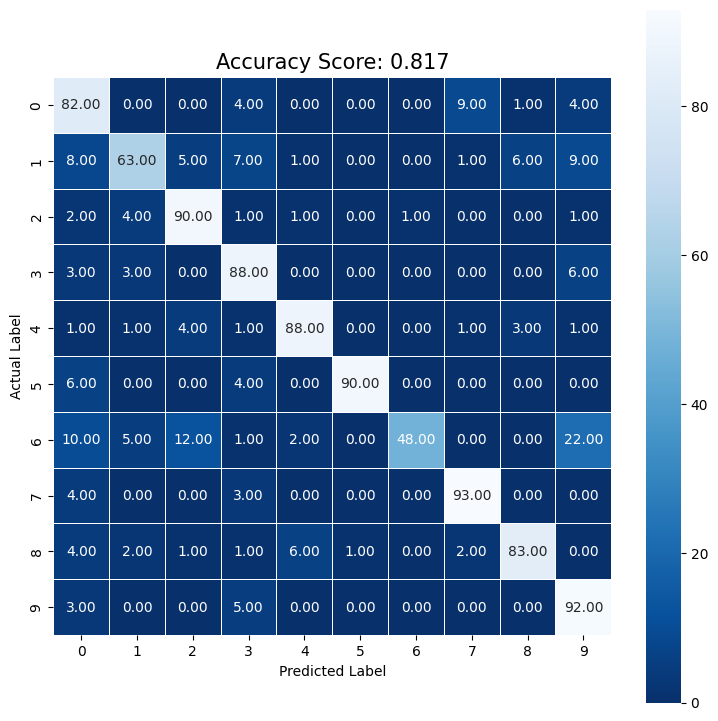

In [37]:
cm = confusion_matrix(y_test, y_pred_ann)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);
plt.show()

Visualisation of testing data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
beta
7
beta
2


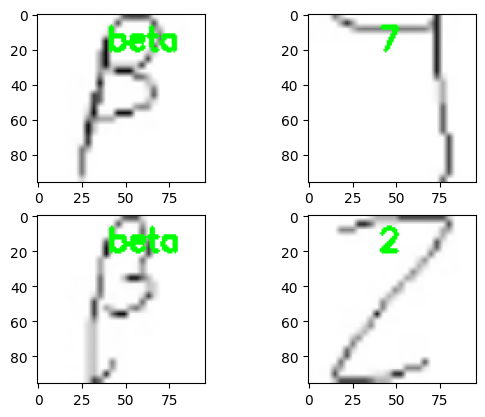

In [42]:
pp_images = []
pp_labels = []

for i in np.random.choice(len(y_test), size=16, replace=False):
    test_img = X_test[i].reshape(28, 28) * 255.0
    test_img = test_img.astype(np.uint8)

    pred_probs = model.predict(X_test[i].reshape(1, -1))
    pred = np.argmax(pred_probs)

    label = label_names[pred] if label_names else str(pred)
    pp_labels.append(label)

    img_view = cv2.resize(test_img, (96, 96), interpolation=cv2.INTER_LINEAR)
    img_view = cv2.cvtColor(img_view, cv2.COLOR_GRAY2BGR)
    cv2.putText(img_view, label, (40, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    pp_images.append(img_view)

    
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(pp_images[1])
print(pp_labels[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(pp_images[2])
print(pp_labels[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(pp_images[3])
print(pp_labels[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(pp_images[4])
print(pp_labels[4])